<a href="https://www.kaggle.com/code/adamparkosidis/titanic-predictions-using-logistic-regression?scriptVersionId=104454196" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Explore The Data

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train.isnull().sum() # check for missing data
# we see that we miss some info in 'Embarked', 'Age' column and a lot more in 'Cabin' column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum() # check for missing data
# we see that we miss some info in 'Fare', 'Age' column and a lot more in 'Cabin' column.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_num= train[['Age','SibSp','Parch','Fare']]
df_str = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

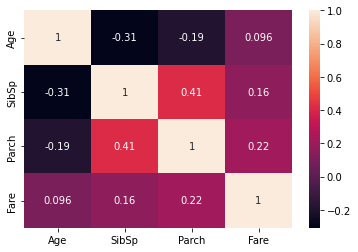

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True)

In [9]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


          Ticket
Survived        
0            549
1            342


<AxesSubplot:xlabel='Survived', ylabel='count'>

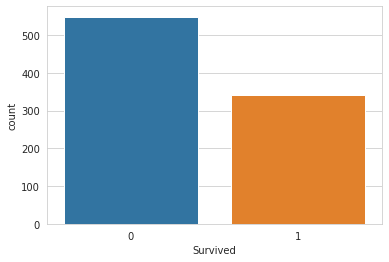

In [10]:
# lets check the number of survivors and non survivors
sns.set_style('whitegrid')
print(pd.pivot_table(train, index = 'Survived', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived') 

# Feature engineering and Data Cleaning

### Sex

Sex       female  male
Survived              
0             81   468
1            233   109


<AxesSubplot:xlabel='Survived', ylabel='count'>

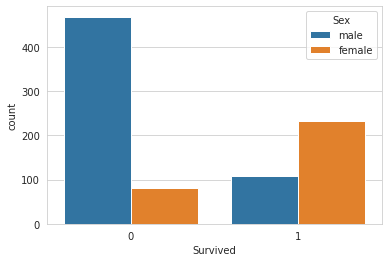

In [11]:
# lets check the number of male and female survivors and non survivors respectively 
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Sex')

### Pclass

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


<AxesSubplot:xlabel='Survived', ylabel='count'>

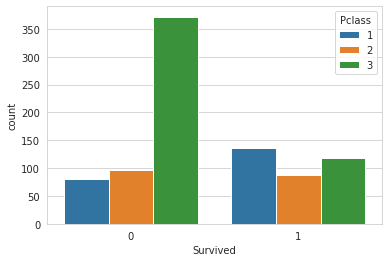

In [12]:
# lets check the number of survivors and non survivors based on their  Ticket Class 
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Pclass') 

In [13]:
def Pclass_cat(n_cla):
    '''
    make Pclass categorical data
    '''
    if n_cla == 1:
        return '1st'
    elif n_cla == 2:
        return '2nd'
    else:
        return '3rd'

In [14]:
train["Pclass"] = train["Pclass"].apply(Pclass_cat)
test["Pclass"] = test["Pclass"].apply(Pclass_cat)

### Embarked

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


<AxesSubplot:xlabel='Survived', ylabel='count'>

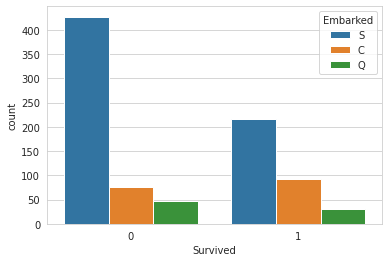

In [15]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Embarked') 

In [16]:
# We miss some data associated with the Embarked place of some passengers, we will try to impute that missing data based on a reasonable guess 
train[train['Embarked'].isnull()]  # both of them were in the 1st class and their Fare prices were both 80

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1st,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1st,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
#Then, show the table of median Fare values sliced by Pclass and Embarked again:
train.groupby([train['Pclass'],train['Embarked']]).median()

PassengerId  Survived   Age  SibSp  Parch     Fare
Pclass Embarked                                                    
1st    C               453.0       1.0  36.5    0.0    0.0  78.2667
       Q               329.5       0.5  38.5    1.5    0.0  90.0000
       S               493.0       1.0  37.0    0.0    0.0  52.0000
2nd    C               390.0       1.0  25.0    1.0    0.0  24.0000
       Q               323.0       1.0  43.5    0.0    0.0  12.3500
       S               439.0       0.0  30.0    0.0    0.0  13.5000
3rd    C               483.0       0.0  20.0    0.0    0.0   7.8958
       Q               400.5       0.0  21.5    0.0    0.0   7.7500
       S               432.0       0.0  25.0    0.0    0.0   8.0500

In [18]:
# Based on the Pclass and the Fare we impute 'Embarked' with reasonable guesses
train.loc[61, 'Embarked'] = 'C'
train.loc[829, 'Embarked'] = 'C'

### Age

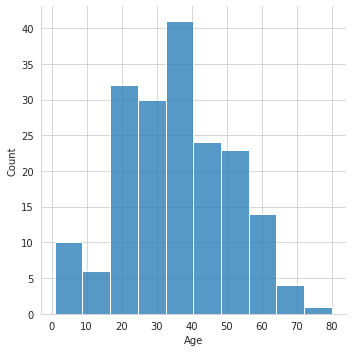

In [19]:
# lets check the Age of the passengers for whom we have info
sns.displot(data=train.dropna(), x='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

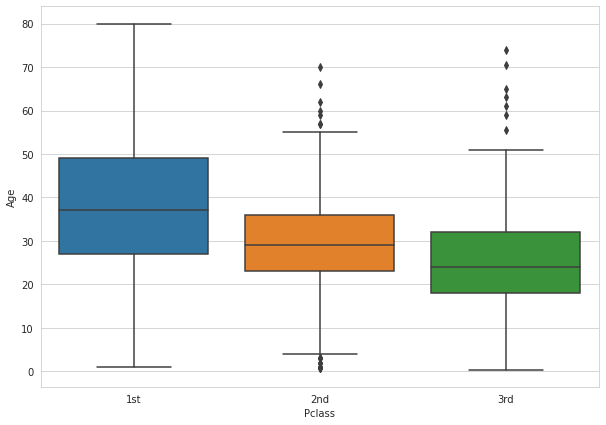

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train, order=['1st','2nd','3rd'])

In [21]:
def impute_age(cols):
    '''
    It seems like a good approach to impute the Age based on the passenger class. For example older people may had more time to accumulate 
    wealth and be in the first class etc.
    '''
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

def AgeGroup(age):
    '''
    We decide to seperate the passengers into 4 Age Groups
    '''
    if age <= 10:
        return 'Kid'
    elif age <= 20:
        return 'Adolescent'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Old'

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1) # filled 'Age' column with reasonable guesses
train['AgeGroup'] = train['Age'].apply(AgeGroup)

test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1) # filled 'Age' column with reasonable guesses
test['AgeGroup'] = test['Age'].apply(AgeGroup)

AgeGroup  Adolescent  Adult  Kid  Old
Survived                             
0                 71    410   26   42
1                 44    238   38   22


<AxesSubplot:xlabel='Survived', ylabel='count'>

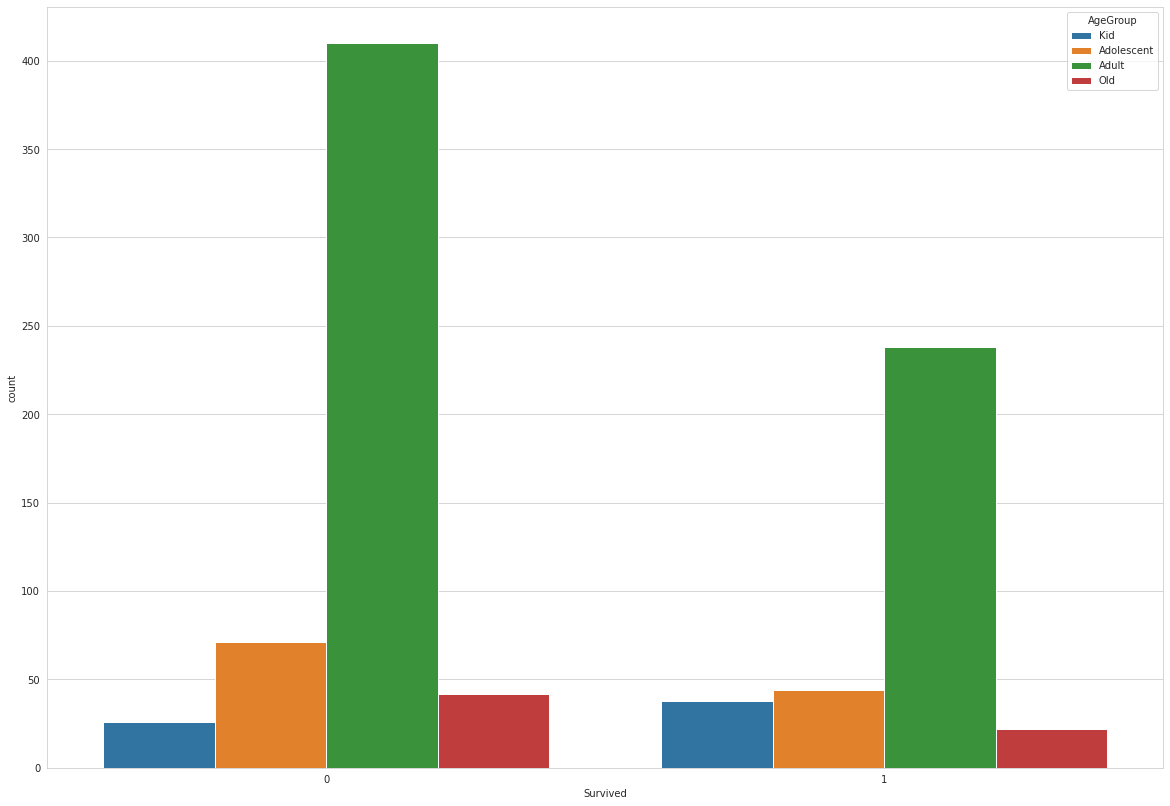

In [23]:
# lets check the number of survivors and non survivors based on their  AgeGroup 
print(pd.pivot_table(train, index = 'Survived', columns = 'AgeGroup', values = 'Ticket' ,aggfunc ='count'))
hue_order = ['Kid','Adolescent', 'Adult', 'Old']
plt.figure(figsize=(20,14))
sns.countplot(data=train, x='Survived', hue = 'AgeGroup', hue_order =hue_order ) 

In [24]:
train.drop('Age', axis= 1, inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
dtype: int64

In [25]:
test.drop('Age', axis= 1, inplace=True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
dtype: int64

### SibSp and Parch

In [26]:
def FamilySize(cols):
    '''
    We decide to count the number of family members and categorize the family size in three categories
    '''
    size = cols[0]+cols[1]
    if size < 1:
        return 'Alone'
    elif size <= 4:
        return 'Medium'
    else:
        return 'Large'


FamilySize  Alone  Large  Medium
Survived                        
0             374     40     135
1             163      7     172


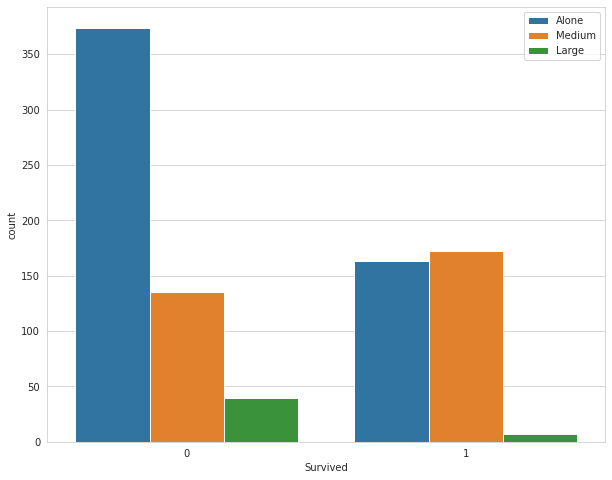

In [27]:
# Family members
train['FamilySize'] = train[['SibSp','Parch']].apply(FamilySize, axis=1)

# lets check the number of survivors and non survivors
plt.figure(figsize=(10,8))
print(pd.pivot_table(train, index = 'Survived', columns = 'FamilySize', values = 'Ticket' ,aggfunc ='count'))
hue_order = ['Alone','Medium','Large']
sns.countplot(data=train, x='Survived',hue = 'FamilySize', hue_order = hue_order) 
plt.legend(loc='upper right')

In [28]:
test['FamilySize'] = test[['SibSp','Parch']].apply(FamilySize, axis=1)

In [29]:
# We now drop the columns that we used 
train.drop(['SibSp','Parch'], axis=1, inplace=True)
test.drop(['SibSp','Parch'], axis=1, inplace=True)

### Name

In [30]:
def salutation(df):
    '''
    Extracts the prefix of the name eg 'Mr'
    '''
    df["Salutation"] = df['Name'].apply(lambda x: x.strip().split('.'))
    df["Salutation"] = df["Salutation"].apply(lambda x: x[0].split(','))
    df["Salutation"] = df["Salutation"].apply(lambda x: x[1])
    df["Salutation"] = df["Salutation"].apply(lambda x: x.strip())
    return df

def replace_salutation(df):
    '''
    Replaces prefixs so that we end up with only four different options
    '''
    df["Salutation"] = df["Salutation"].apply(lambda x: 'Miss' if x in ['Ms', 'Lady', 'Mlle', 'Mme'] else x)
    df["Salutation"] = df["Salutation"].apply(lambda x: 'Master' if x in ['Major','Don', 'Sir'] else x)
    df["Salutation"] = df["Salutation"].apply(lambda x: 'Mr' if x in ['Col', 'Capt', 'Jonkheer', 'Rev'] else x)
    df["Salutation"] = df["Salutation"].apply(lambda x: 'Mrs' if x in ['Dona','the Countess'] else x)
    return df

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Salutation, dtype: int64


<AxesSubplot:>

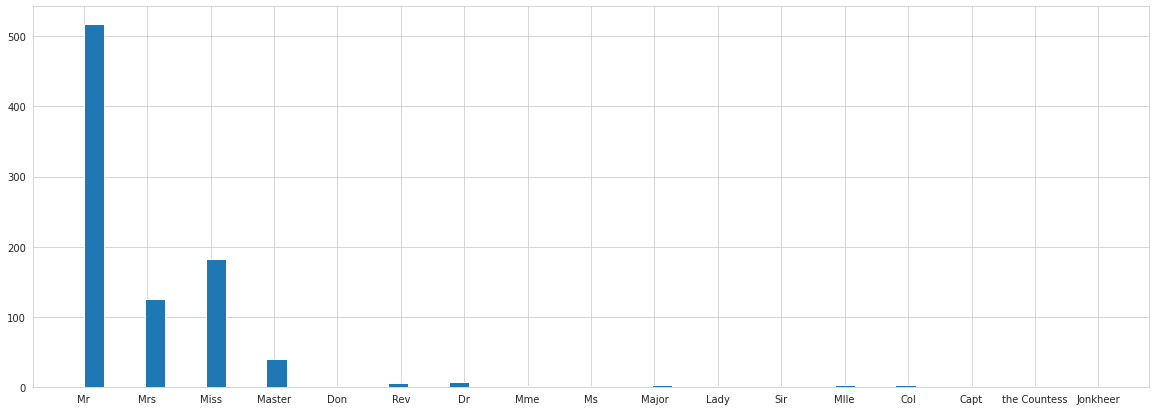

In [31]:
train = salutation(train)
print(train["Salutation"].value_counts())
train["Salutation"].hist(figsize=(20,7),bins=50)

In [32]:
import_people = train[train["Salutation"].apply(lambda prefix: prefix not in ['Mr', 'Mrs', 'Miss', 'Master'])] # the four options we will use
print(pd.pivot_table(import_people, index = 'Survived', columns = 'Salutation', values = 'Ticket' ,aggfunc ='count'))

Salutation  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Mlle  Mme   Ms  Rev  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0   NaN  NaN  NaN  6.0   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0   2.0  1.0  1.0  NaN   

Salutation  Sir  the Countess  
Survived                       
0           NaN           NaN  
1           1.0           1.0  


In [33]:
# We to be carefull because some prefixes may correspond to a male or a female eg on Dr is female

import_people.groupby(['Salutation','Sex']).count()

PassengerId  Survived  Pclass  Name  Ticket  Fare  Cabin  \
Salutation   Sex                                                                
Capt         male              1         1       1     1       1     1      1   
Col          male              2         2       2     2       2     2      1   
Don          male              1         1       1     1       1     1      0   
Dr           female            1         1       1     1       1     1      1   
             male              6         6       6     6       6     6      2   
Jonkheer     male              1         1       1     1       1     1      0   
Lady         female            1         1       1     1       1     1      1   
Major        male              2         2       2     2       2     2      2   
Mlle         female            2         2       2     2       2     2      2   
Mme          female            1         1       1     1       1     1      1   
Ms           female            1         1       1     1       1     1      0   
Rev          male              6         6       6     6       6     6      0   
Sir          male              1         1       1     1       1     1      1   
the Countess female            1         1       1     1       1     1      1   

                     Embarked  AgeGroup  FamilySize  
Salutation   Sex                                     
Capt         male           1         1           1  
Col          male           2         2           2  
Don          male           1         1           1  
Dr           female         1         1           1  
             male           6         6           6  
Jonkheer     male           1         1           1  
Lady         female         1         1           1  
Major        male           2         2           2  
Mlle         female         2         2           2  
Mme          female         1         1           1  
Ms           female         1         1           1  
Rev          male           6         6           6  
Sir          male           1         1           1  
the Countess female         1         1           1

In [34]:
train = replace_salutation(train)

# some Drs are female thus we need to be carefull by replacing the prefix
male_Drs = train.loc[(train['Salutation'] == 'Dr') & (train['Sex'] == 'male')].index
female_Drs = train.loc[(train['Salutation'] == 'Dr') & (train['Sex'] == 'female')].index
train.loc[male_Drs,'Salutation'] = 'Mr'
train.loc[female_Drs,'Salutation'] = 'Mrs'

Salutation  Master  Miss   Mr  Mrs
Survived                          
0               19    55  449   26
1               25   132   84  101


<AxesSubplot:xlabel='Survived', ylabel='count'>

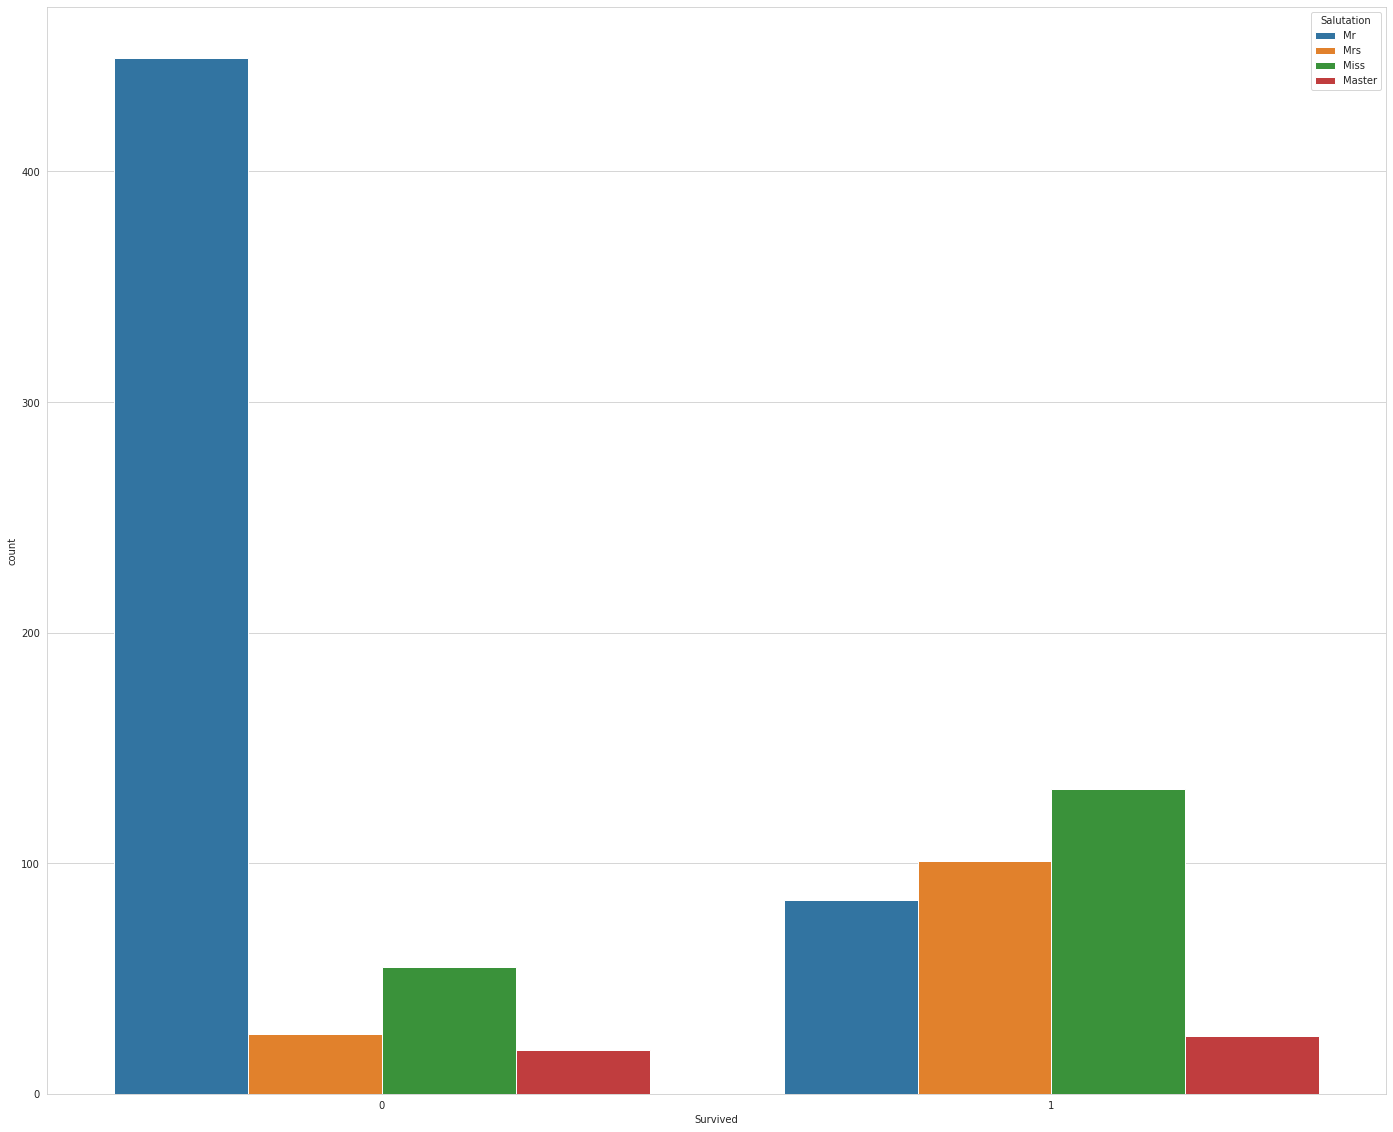

In [35]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Salutation', values = 'Ticket' ,aggfunc ='count'))
plt.figure(figsize=(24,20))
sns.countplot(data=train, x='Survived', hue='Salutation')

**We can clearly see some patterns here e.g. more people with the 'Mrs' and 'Miss' prefixs survived, while more people with the prefix 'Mr' did not**

In [36]:
test = salutation(test)
test = replace_salutation(test)
male_Drs = test.loc[(test['Salutation'] == 'Dr') & (test['Sex'] == 'male')].index
test.loc[male_Drs,'Salutation'] = 'Mr'
print(test["Salutation"].value_counts())

Mr        245
Miss       79
Mrs        73
Master     21
Name: Salutation, dtype: int64


### Ticket

In [37]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Numeric_Tickets  False  True
Survived                    
0                  142   407
1                   88   254


<AxesSubplot:xlabel='Survived', ylabel='count'>

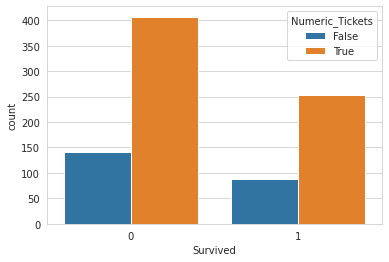

In [38]:
# Some tickets have only numbers, while other tickets contain also letters. Lets try to find motifs based on theat difference
train['Numeric_Tickets'] = train['Ticket'].apply(lambda x: True if x[0].isnumeric()==True else False)

# lets check the number of survivors and non survivors
print(pd.pivot_table(train, index = 'Survived', columns = 'Numeric_Tickets', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Numeric_Tickets') 

**It does not seem to be any difference between tickets where the first character is a number or not, but we can can explore if there is 
something interesting depending on the specific number or the specific letter. Maybe the first letter/number of the Ticket can give us some info**

In [39]:
def first_char(df):
    first_num = []
    first_letter = []
    first_num_2 = []
    for i in df['Ticket'].values:
        if i[0].isnumeric(): 
            first_num.append(i[0])
        else: 
            first_letter.append(i[0])
            first_num_2.append(i.split()[-1][0])
    return first_num, first_letter, first_num_2


In [40]:
first_num, first_letter, first_num_2 = first_char(train)
print(np.unique(first_num,return_counts=True))   # type string
print(np.unique(first_letter,return_counts=True))

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1'), array([146, 183, 301,  10,   3,   6,   9,   2,   1]))
(array(['A', 'C', 'F', 'L', 'P', 'S', 'W'], dtype='<U1'), array([29, 47,  7,  4, 65, 65, 13]))


In [41]:
train['Ticket_first_char'] = train['Ticket'].apply(lambda x: x[0])

Ticket_first_char     1     2      3    4    5    6    7    8    9
Survived                                                          
0                  54.0  98.0  229.0  8.0  3.0  5.0  8.0  2.0  NaN
1                  92.0  85.0   72.0  2.0  NaN  1.0  1.0  NaN  1.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

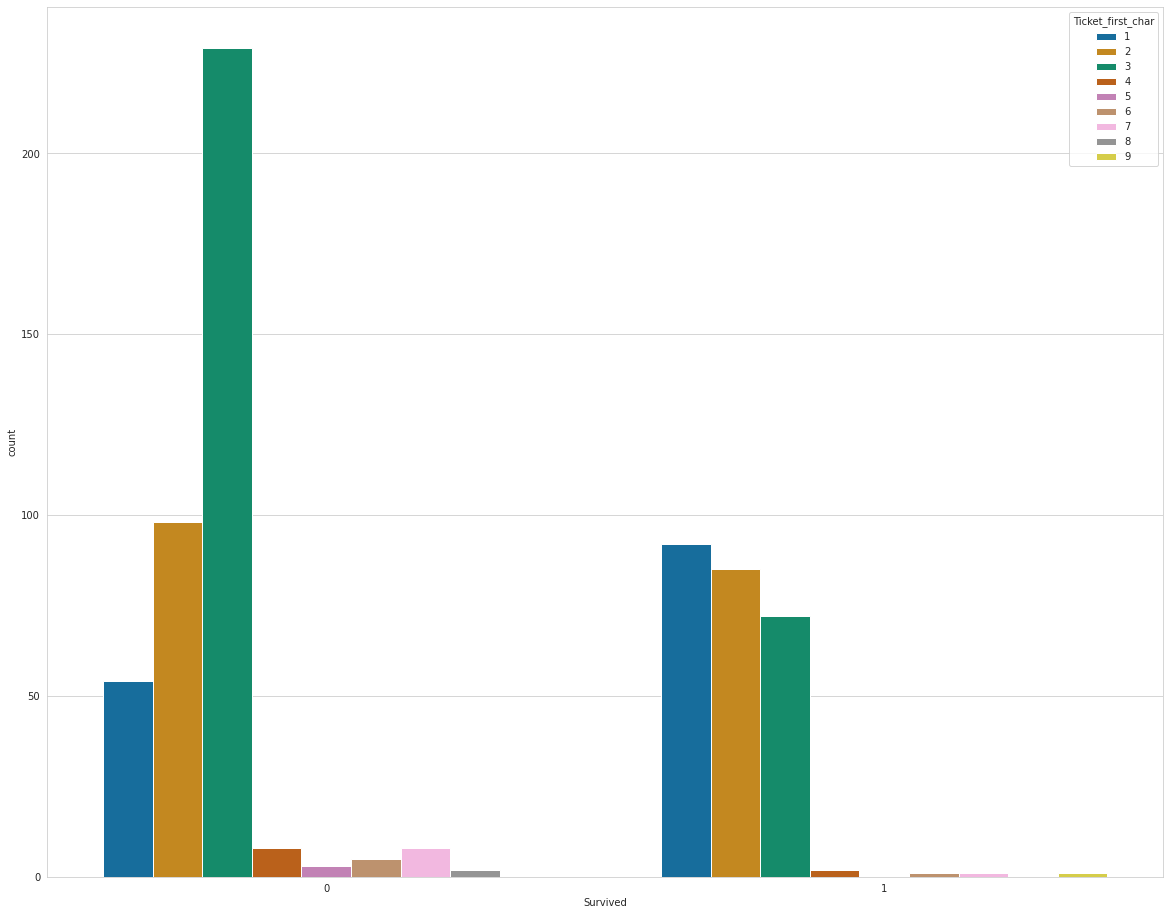

In [42]:
numeric = train[train['Ticket'].apply(lambda x: x[0].isnumeric())]
print(pd.pivot_table(numeric, index = 'Survived', columns = 'Ticket_first_char', values = 'Ticket' ,aggfunc ='count'))
hue_order = sorted(numeric['Ticket_first_char'].value_counts().index)
plt.figure(figsize=(20,16))
sns.countplot(data=numeric, x='Survived',hue = 'Ticket_first_char',hue_order=hue_order,palette='colorblind') 

**We can clearly see some patterns here eg people where the first number on their ticket was 1 where more likely to survive
than people where the first number on their ticket was 3. Maybe the first number indicates the position of the passenger on the ship etc.**

Ticket_first_char   A   C  F  L   P   S   W
Survived                                   
0                  27  31  3  3  23  44  11
1                   2  16  4  1  42  21   2


<AxesSubplot:xlabel='Survived', ylabel='count'>

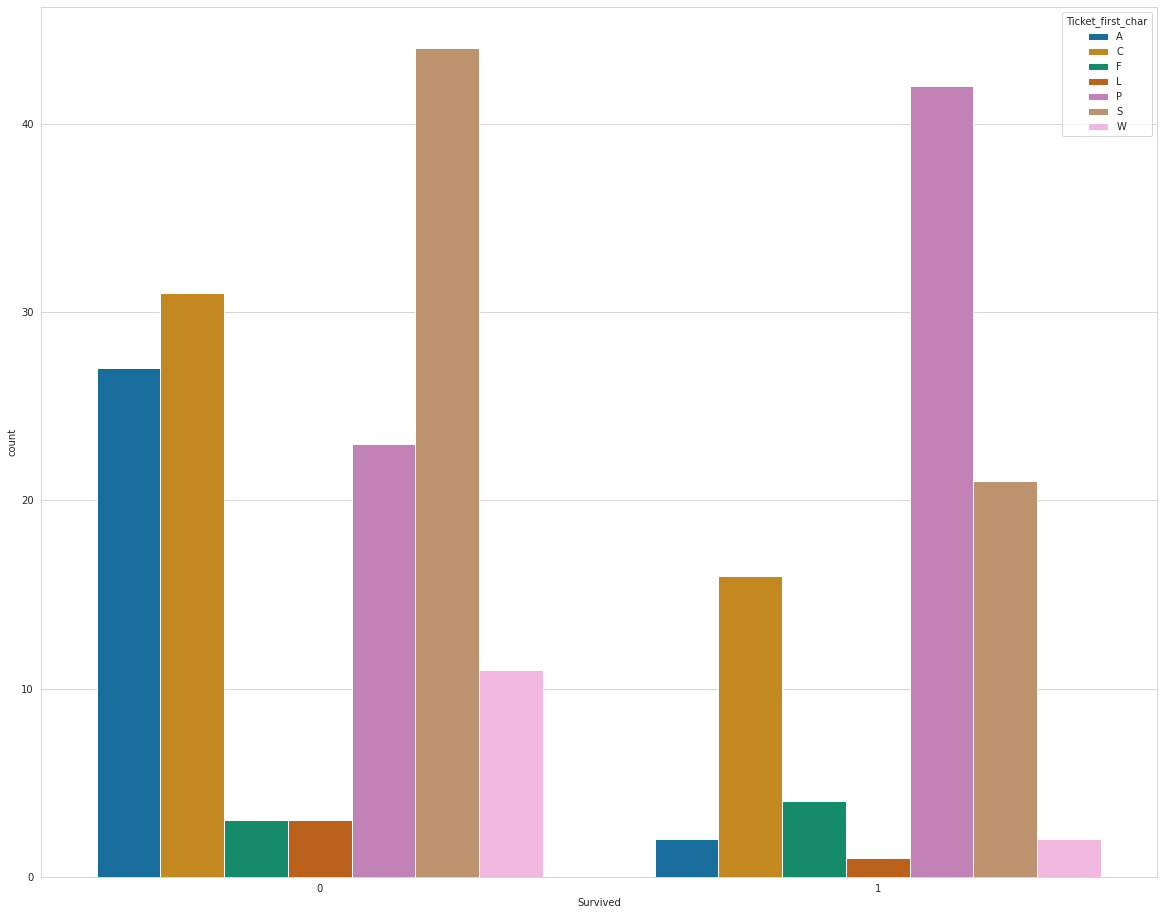

In [43]:
letter = train[train['Ticket'].apply(lambda x: x[0].isnumeric())== False]
print(pd.pivot_table(letter, index = 'Survived', columns = 'Ticket_first_char', values = 'Ticket' ,aggfunc ='count'))
hue_order = sorted(letter['Ticket_first_char'].value_counts().index)
plt.figure(figsize=(20,16))
sns.countplot(data=letter, x='Survived',hue = 'Ticket_first_char',hue_order=hue_order,palette='colorblind')

**We can clearly see some patterns here eg people where the first letter on their ticket was P where more likely to survive
than people where the first letter on their ticket was A. It is also interesting to notice that most people where the first 
letter on their ticket was P had also number 1 as the first number on the numerical part of the ticket name. On the other hand
most people where the first letter on their ticket was A had not  number 1 as the first number on the numerical part of the ticket name.
Maybe the letter is associated just with a cabin, while the first number still indicates the position of the passenger on the ship, thus we gonna
use this numbers to our model.**

In [44]:
train['Ticket_first_char'] = train['Ticket'].apply(lambda x: x[0] if x[0].isnumeric() else x.split()[-1][0])
train['Ticket_first_char'] = train['Ticket_first_char'].apply(lambda x: '8' if x=='L' else x) 

In [45]:
first_num, first_letter, first_num_2 = first_char(test)
print(np.unique(first_num,return_counts=True))
print(np.unique(first_letter,return_counts=True))

(array(['1', '2', '3', '4', '6', '7', '9'], dtype='<U1'), array([ 64,  95, 128,   1,   3,   4,   1]))
(array(['A', 'C', 'F', 'L', 'P', 'S', 'W'], dtype='<U1'), array([13, 30,  6,  1, 33, 33,  6]))


In [46]:
test['Ticket_first_char'] = test['Ticket'].apply(lambda x: x[0])
test['Ticket_first_char'] = test['Ticket'].apply(lambda x: x[0] if x[0].isnumeric() else x.split()[-1][0])
test['Ticket_first_char'] = test['Ticket_first_char'].apply(lambda x: '8' if x=='L' else x) 

In [47]:
train.drop(['PassengerId','Name','Ticket','Numeric_Tickets'], axis=1, inplace=True)
test.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

### Fare

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


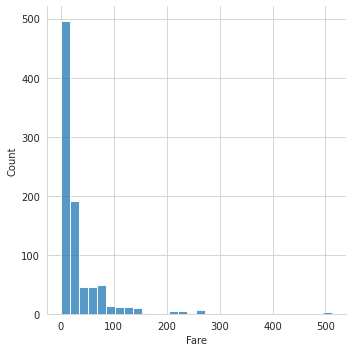

In [48]:
# lets check thow much people paid

print(train['Fare'].value_counts())
sns.displot(data=train, x='Fare', bins=30)

In [49]:
print(train.groupby(['Pclass','Embarked']).mean()['Fare'])

Pclass  Embarked
1st     C           104.150287
        Q            90.000000
        S            70.364862
2nd     C            25.358335
        Q            12.350000
        S            20.327439
3rd     C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64


**Clearly people at the first class paid on average higher Fare**

In [50]:
# lets categorize it the Fare in three groups (like the Classes) 
fare_groups = pd.qcut(train['Fare'], 4).value_counts()
fare_groups

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare, dtype: int64

In [51]:
train['Survived'].groupby(pd.qcut(train['Fare'], 4)).mean()

Fare
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [52]:
test[test['Fare'].isnull()]

,Pclass,Sex,Fare,Cabin,Embarked,AgeGroup,FamilySize,Salutation,Ticket_first_char
152,3rd,male,NaN,NaN,S,Old,Alone,Mr,3


In [53]:
#Then, show the table of median Fare values sliced by Pclass and Embarked again:
train.groupby([train['Pclass'],train['Embarked']]).median()

Survived     Fare
Pclass Embarked                   
1st    C              1.0  79.2000
       Q              0.5  90.0000
       S              1.0  52.0000
2nd    C              1.0  24.0000
       Q              1.0  12.3500
       S              0.0  13.5000
3rd    C              0.0   7.8958
       Q              0.0   7.7500
       S              0.0   8.0500

In [54]:
# Based on the Pclass and the Embarked we impute 'Fare' with reasonable guesses
test.loc[152, 'Fare'] = 8.0500

### Cabin

In [55]:
# We miss 75% of 'Cabin' column data so we will drop it
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [56]:
# create dummy variables

pclass=pd.get_dummies(train['Pclass'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
salutation = pd.get_dummies(train['Salutation'],drop_first=True)
ageGroup = pd.get_dummies(train['AgeGroup'],drop_first=True)
familySize = pd.get_dummies(train['FamilySize'],drop_first=True)
ticket_first_char=pd.get_dummies(train['Ticket_first_char'],drop_first=True)

In [57]:
train = pd.concat([train,pclass,sex,embark,salutation,ageGroup,familySize,ticket_first_char], axis=1)
train.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeGroup,FamilySize,Salutation,Ticket_first_char,2nd,...,Large,Medium,2,3,4,5,6,7,8,9
0,0,3rd,male,7.2500,S,Adult,Medium,Mr,2,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1st,female,71.2833,C,Adult,Medium,Mrs,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,3rd,female,7.9250,S,Adult,Alone,Miss,3,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1st,female,53.1000,S,Adult,Medium,Mrs,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,3rd,male,8.0500,S,Adult,Alone,Mr,3,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
train.drop(['Pclass','Sex','Embarked','FamilySize','AgeGroup','Salutation','Ticket_first_char'],axis=1,inplace=True)
train.head()
train.dropna()

,Survived,Fare,2nd,3rd,male,Q,S,Miss,Mr,Mrs,...,Large,Medium,2,3,4,5,6,7,8,9
0,0,7.2500,0,1,1,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,1,71.2833,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,7.9250,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,53.1000,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,8.0500,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
887,1,30.0000,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,23.4500,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
889,1,30.0000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)


# Normalizing the Data

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [62]:
logmodel = LogisticRegression(max_iter = 10000)
rfc = RandomForestClassifier()
nb = GaussianNB()
sgd = SGDClassifier(max_iter = 10000)

In [63]:
logmodel.fit(X_train,y_train)
rfc.fit(X_train,y_train)
nb.fit(X_train,y_train)
sgd.fit(X_train,y_train)

SGDClassifier(max_iter=10000)

In [64]:
predictions_1 = logmodel.predict(X_test)
predictions_2 = rfc.predict(X_test)
predictions_3 = nb.predict(X_test)
predictions_4 = sgd.predict(X_test)

## Evalute my Model

In [65]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [66]:
print(confusion_matrix(y_test,predictions_1))
print(classification_report(y_test,predictions_1))
accuracy_score(predictions_1, y_test)

[[136  18]
 [ 33  81]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       154
           1       0.82      0.71      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



0.8097014925373134

In [67]:
print(confusion_matrix(y_test,predictions_2))
print(classification_report(y_test,predictions_2))
accuracy_score(predictions_2, y_test)

[[130  24]
 [ 37  77]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       154
           1       0.76      0.68      0.72       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



0.7723880597014925

In [68]:
print(confusion_matrix(y_test,predictions_3))
print(classification_report(y_test,predictions_3))
accuracy_score(predictions_3, y_test)

[[145   9]
 [ 53  61]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       154
           1       0.87      0.54      0.66       114

    accuracy                           0.77       268
   macro avg       0.80      0.74      0.74       268
weighted avg       0.79      0.77      0.76       268



0.7686567164179104

In [69]:
print(confusion_matrix(y_test,predictions_4))
print(classification_report(y_test,predictions_4))
accuracy_score(predictions_4, y_test)

[[143  11]
 [ 35  79]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       154
           1       0.88      0.69      0.77       114

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.83      0.82       268



0.8283582089552238

## Optimal parameters for the best models

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# GridSearch for the Logistic Regression model

param_grid = {"C":np.logspace(-3,3,7),
              "penalty":[ 'l1', 'l2', 'elasticnet']}
CV_logmodel = GridSearchCV(estimator=logmodel, param_grid=param_grid, verbose = 0)
CV_logmodel.fit(X_train, y_train)
CV_logmodel.best_params_
CV_logmodel.best_estimator_

# GridSearch for the Naive Bayes Gaussian model

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

CV_nb = GridSearchCV(estimator=nb, param_grid=param_grid, verbose=0)
CV_nb.fit(X_train, y_train)
CV_nb.best_params_
CV_nb.best_estimator_

# GridSearch for the Support Vector Machine model

param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid, verbose = 0)
CV_sgd.fit(X_train, y_train)
CV_sgd.best_params_
CV_sgd.best_estimator_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

SGDClassifier(loss='log', max_iter=10000, penalty='l1')

In [72]:
predictions_lr = CV_logmodel.predict(X_test)

print(confusion_matrix(y_test,predictions_lr))
print(classification_report(y_test,predictions_lr))
accuracy_score(predictions_lr, y_test)

[[135  19]
 [ 32  82]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       154
           1       0.81      0.72      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



0.8097014925373134

In [73]:
predictions_nb = CV_nb.predict(X_test)

print(confusion_matrix(y_test,predictions_nb))
print(classification_report(y_test,predictions_nb))
accuracy_score(predictions_nb, y_test)

[[137  17]
 [ 33  81]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       154
           1       0.83      0.71      0.76       114

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



0.8134328358208955

In [74]:
predictions_sgd = CV_sgd.predict(X_test)

print(confusion_matrix(y_test,predictions_sgd))
print(classification_report(y_test,predictions_sgd))
accuracy_score(predictions_sgd, y_test)

[[137  17]
 [ 38  76]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



0.7947761194029851

# Predictions

In [75]:
pclass=pd.get_dummies(test['Pclass'],drop_first=True)
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
salutation = pd.get_dummies(test['Salutation'],drop_first=True)
ageGroup = pd.get_dummies(test['AgeGroup'],drop_first=True)
familySize = pd.get_dummies(test['FamilySize'],drop_first=True)
ticket_first_char=pd.get_dummies(test['Ticket_first_char'],drop_first=True)

In [76]:
test = pd.concat([test,pclass,sex,embark,salutation,ageGroup,familySize,ticket_first_char], axis=1)
test.drop(['Pclass','Sex','Embarked','FamilySize','AgeGroup','Salutation','Ticket_first_char'],axis=1,inplace=True)
test.head()

,Fare,2nd,3rd,male,Q,S,Miss,Mr,Mrs,Adult,...,Large,Medium,2,3,4,5,6,7,8,9
0,7.8292,0,1,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,7.0000,0,1,0,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
2,9.6875,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8.6625,0,1,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,12.2875,0,1,0,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0


## Train the best model with the full dataset

In [77]:
X_train = train.drop('Survived',axis = 1)
y_train = train['Survived']

In [78]:
# GridSearch for the Support Vector Machine model

param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid, verbose = 0)
CV_sgd.fit(X_train, y_train)
CV_sgd.best_params_
CV_sgd.best_estimator_

SGDClassifier(alpha=0.01, loss='squared_hinge', max_iter=10000, penalty='none')

In [79]:
X_test = test
# predict based on our best model
predictions = CV_sgd.predict(X_test)

In [80]:
output = pd.DataFrame({'PassengerId': X_test.index+892, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
